# Day 2
batch size 256 lr 1e-3, normed weighted

### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
os.environ['MKL_THREADING_LAYER']='GNU'
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

/home/giles/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/giles/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


## Options

In [2]:
classTrainFeatures = basic_features
classModel = 'modelSwish'
varSet = "basic_features"

nSplits = 10
ensembleSize = 10
ensembleMode = 'loss'

maxEpochs = 200
compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam'}
trainParams = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
modelParams = {'version':classModel, 'nIn':len(classTrainFeatures), 'compileArgs':compileArgs}

print "\nTraining on", len(classTrainFeatures), "features:", [var for var in classTrainFeatures]


Training on 30 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt']


## Import data

In [3]:
trainData = h5py.File(dirLoc + 'train.hdf5', "r+")
valData = h5py.File(dirLoc + 'val.hdf5', "r+")

## Determine LR

2 classes found, running in binary mode


______________________________________
Training finished
Cross-validation took 1.362s 


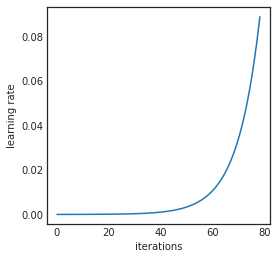

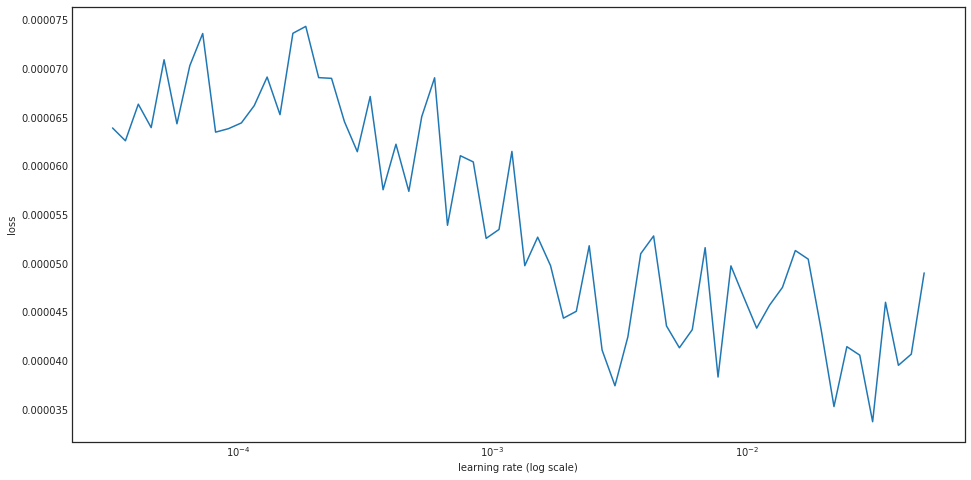

______________________________________



In [9]:
lrFinder = batchLRFindClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, lrBounds=[1e-5,1e-1], trainOnWeights=True, verbose=0)

In [10]:
compileArgs['lr'] = 1e-3

## Train classifier

Using cosine annealing
Training using weights
Running fold 1 / 10
2 classes found, running in binary mode



/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158277). Check your callbacks.
  % delta_t_median)


1 New best found: 4.27555195541e-05
2 New best found: 3.84180455384e-05
3 New best found: 3.68978217742e-05
4 New best found: 3.60291505152e-05
5 New best found: 3.48953782421e-05
6 New best found: 3.44521093852e-05
7 New best found: 3.44194341525e-05
9 New best found: 3.41729660353e-05
10 New best found: 3.39498626354e-05
11 New best found: 3.37710518498e-05
12 New best found: 3.33669297009e-05
13 New best found: 3.30322463099e-05
14 New best found: 3.29949701999e-05
15 New best found: 3.29858534195e-05
20 New best found: 3.28980661415e-05
22 New best found: 3.2686258168e-05
23 New best found: 3.24880809172e-05
27 New best found: 3.23703675633e-05
28 New best found: 3.23073669069e-05
30 New best found: 3.23024885884e-05
31 New best found: 3.22931971347e-05
48 New best found: 3.22905229872e-05
49 New best found: 3.20795570761e-05
50 New best found: 3.20593026931e-05
56 New best found: 3.20421610891e-05
57 New best found: 3.19925218005e-05
58 New best found: 3.19312332423e-05
59 New bes

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.180965). Check your callbacks.
  % delta_t_median)


1 New best found: 4.42835749454e-05
2 New best found: 3.75652172097e-05
3 New best found: 3.66607089112e-05
4 New best found: 3.64837267064e-05
5 New best found: 3.50747488015e-05
6 New best found: 3.46848734402e-05
7 New best found: 3.46411793184e-05
8 New best found: 3.45519840661e-05
10 New best found: 3.45254052125e-05
11 New best found: 3.39834451587e-05
12 New best found: 3.38840485007e-05
13 New best found: 3.36982079644e-05
14 New best found: 3.36828210117e-05
15 New best found: 3.3674837489e-05
22 New best found: 3.36036820835e-05
23 New best found: 3.33817823427e-05
24 New best found: 3.33676452941e-05
26 New best found: 3.32693506755e-05
27 New best found: 3.31063628747e-05
31 New best found: 3.31059976871e-05
45 New best found: 3.30364463202e-05
48 New best found: 3.30121994446e-05
49 New best found: 3.28532437876e-05
53 New best found: 3.28380627399e-05
54 New best found: 3.27809096913e-05
58 New best found: 3.27529747307e-05
93 New best found: 3.27195149897e-05
94 New bes

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.161646). Check your callbacks.
  % delta_t_median)


1 New best found: 4.21391931924e-05
2 New best found: 3.78978599647e-05
3 New best found: 3.65902310988e-05
4 New best found: 3.56255743633e-05
5 New best found: 3.53205496874e-05
6 New best found: 3.42386976914e-05
7 New best found: 3.4171258617e-05
10 New best found: 3.40727240404e-05
11 New best found: 3.35476354703e-05
12 New best found: 3.34600631405e-05
13 New best found: 3.33070980435e-05
14 New best found: 3.32750343354e-05
15 New best found: 3.32471154971e-05
20 New best found: 3.32259339663e-05
22 New best found: 3.30583397799e-05
24 New best found: 3.29914607922e-05
25 New best found: 3.26837589965e-05
28 New best found: 3.26058685486e-05
29 New best found: 3.2583041177e-05
30 New best found: 3.25504652219e-05
31 New best found: 3.25488393896e-05
46 New best found: 3.24367798437e-05
48 New best found: 3.22854416633e-05
55 New best found: 3.22515702727e-05
57 New best found: 3.21937627308e-05
58 New best found: 3.21513273499e-05
97 New best found: 3.2121548329e-05
100 New bes

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.185601). Check your callbacks.
  % delta_t_median)


1 New best found: 4.03448206495e-05
2 New best found: 3.66814666419e-05
3 New best found: 3.62789296818e-05
4 New best found: 3.61783525214e-05
5 New best found: 3.49265483321e-05
6 New best found: 3.46301582505e-05
7 New best found: 3.45804901909e-05
8 New best found: 3.45775364266e-05
9 New best found: 3.45530717518e-05
10 New best found: 3.40751208534e-05
11 New best found: 3.36984408072e-05
13 New best found: 3.35756339661e-05
14 New best found: 3.32994578337e-05
15 New best found: 3.32931130997e-05
20 New best found: 3.32496755994e-05
22 New best found: 3.32405567093e-05
23 New best found: 3.26780659475e-05
26 New best found: 3.26037546548e-05
27 New best found: 3.2547299934e-05
29 New best found: 3.25260494649e-05
43 New best found: 3.24424664734e-05
48 New best found: 3.23876882323e-05
52 New best found: 3.23225126841e-05
53 New best found: 3.22127641301e-05
58 New best found: 3.21865142115e-05
59 New best found: 3.21665008702e-05
61 New best found: 3.21622349248e-05
62 New best

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.297962). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150028). Check your callbacks.
  % delta_t_median)


1 New best found: 4.228133371e-05
2 New best found: 3.80504135097e-05
3 New best found: 3.70491616682e-05
4 New best found: 3.67200751157e-05
5 New best found: 3.54983304499e-05
6 New best found: 3.43752109886e-05
7 New best found: 3.42733319551e-05
10 New best found: 3.34555644079e-05
11 New best found: 3.33500797592e-05
12 New best found: 3.31362776623e-05
13 New best found: 3.30928425175e-05
14 New best found: 3.30056308161e-05
15 New best found: 3.29621418385e-05
19 New best found: 3.29207432257e-05
21 New best found: 3.28906492104e-05
23 New best found: 3.28497804101e-05
25 New best found: 3.25430909205e-05
27 New best found: 3.25139540441e-05
28 New best found: 3.24522659536e-05
29 New best found: 3.23976737906e-05
30 New best found: 3.23921108655e-05
43 New best found: 3.23593719704e-05
50 New best found: 3.23377406189e-05
52 New best found: 3.23225930422e-05
54 New best found: 3.22076388296e-05
55 New best found: 3.21472293133e-05
56 New best found: 3.21121726028e-05
91 New bes

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.209265). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104985). Check your callbacks.
  % delta_t_median)


1 New best found: 4.19911577853e-05
2 New best found: 3.73432955639e-05
3 New best found: 3.66037704225e-05
4 New best found: 3.61582517174e-05
5 New best found: 3.51482458182e-05
6 New best found: 3.51170603931e-05
7 New best found: 3.47992404005e-05
8 New best found: 3.457056566e-05
9 New best found: 3.45242302972e-05
10 New best found: 3.40208811791e-05
12 New best found: 3.35150133546e-05
13 New best found: 3.3468611821e-05
14 New best found: 3.33866101266e-05
15 New best found: 3.33702386904e-05
22 New best found: 3.31518919415e-05
23 New best found: 3.30818264321e-05
25 New best found: 3.30301671321e-05
26 New best found: 3.29007279954e-05
27 New best found: 3.27519885127e-05
28 New best found: 3.27377957772e-05
29 New best found: 3.26951449081e-05
30 New best found: 3.26782958646e-05
31 New best found: 3.26733287291e-05
47 New best found: 3.26608399024e-05
48 New best found: 3.25840482461e-05
49 New best found: 3.25727971581e-05
50 New best found: 3.25243448129e-05
52 New best f

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.221130). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110928). Check your callbacks.
  % delta_t_median)


1 New best found: 4.31513530706e-05
2 New best found: 3.88480999633e-05
3 New best found: 3.77825387532e-05
4 New best found: 3.67250553864e-05
5 New best found: 3.58677120785e-05
6 New best found: 3.53569915492e-05
7 New best found: 3.5274646119e-05
10 New best found: 3.45964232384e-05
11 New best found: 3.43002693733e-05
12 New best found: 3.4086965826e-05
13 New best found: 3.39119640041e-05
14 New best found: 3.38145742734e-05
15 New best found: 3.3811882092e-05
22 New best found: 3.35931434763e-05
23 New best found: 3.34632086258e-05
25 New best found: 3.33979034209e-05
27 New best found: 3.33188429006e-05
28 New best found: 3.32527501486e-05
45 New best found: 3.31812574004e-05
48 New best found: 3.31408894427e-05
51 New best found: 3.30120031067e-05
53 New best found: 3.30044735954e-05
56 New best found: 3.29868113128e-05
58 New best found: 3.29317728515e-05
59 New best found: 3.29004128879e-05
104 New best found: 3.28774729018e-05
113 New best found: 3.28214706382e-05
115 New b

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.263887). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132345). Check your callbacks.
  % delta_t_median)


1 New best found: 4.42535434726e-05
2 New best found: 3.85286039173e-05
3 New best found: 3.73959524173e-05
4 New best found: 3.68872263884e-05
5 New best found: 3.59337756188e-05
6 New best found: 3.55371747455e-05
7 New best found: 3.53825914364e-05
9 New best found: 3.50679368927e-05
10 New best found: 3.49943097852e-05
11 New best found: 3.46133352461e-05
13 New best found: 3.43208817028e-05
14 New best found: 3.42873683467e-05
22 New best found: 3.40852654801e-05
25 New best found: 3.4018099686e-05
26 New best found: 3.39014366e-05
27 New best found: 3.38848712156e-05
28 New best found: 3.37567723641e-05
29 New best found: 3.37179437358e-05
30 New best found: 3.36987502732e-05
31 New best found: 3.3689032464e-05
47 New best found: 3.35455081565e-05
49 New best found: 3.34712949233e-05
53 New best found: 3.34628159186e-05
56 New best found: 3.33594694855e-05
58 New best found: 3.33339058269e-05
106 New best found: 3.32914906449e-05
109 New best found: 3.3274033471e-05
110 New best 

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.254699). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127745). Check your callbacks.
  % delta_t_median)


1 New best found: 4.28731462909e-05
2 New best found: 3.79487511485e-05
3 New best found: 3.68184427208e-05
4 New best found: 3.52270393351e-05
5 New best found: 3.44414786089e-05
6 New best found: 3.40614150684e-05
7 New best found: 3.3971061486e-05
8 New best found: 3.39080508929e-05
9 New best found: 3.37132211026e-05
11 New best found: 3.33256367471e-05
12 New best found: 3.31206869875e-05
13 New best found: 3.28582231364e-05
14 New best found: 3.27979400999e-05
15 New best found: 3.27783805046e-05
22 New best found: 3.24968217275e-05
24 New best found: 3.22939054102e-05
26 New best found: 3.22724155795e-05
27 New best found: 3.21254548509e-05
29 New best found: 3.21161547608e-05
30 New best found: 3.20756433328e-05
31 New best found: 3.20744472478e-05
48 New best found: 3.20493052707e-05
49 New best found: 3.19654990511e-05
54 New best found: 3.19047160228e-05
55 New best found: 3.18466547818e-05
57 New best found: 3.18154583098e-05
58 New best found: 3.18145998256e-05
59 New best

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.292597). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146733). Check your callbacks.
  % delta_t_median)


1 New best found: 4.29846107746e-05
2 New best found: 3.78312555129e-05
3 New best found: 3.63077069477e-05
4 New best found: 3.54880049515e-05
5 New best found: 3.43210485905e-05
6 New best found: 3.3978980591e-05
7 New best found: 3.39447174458e-05
10 New best found: 3.36846502404e-05
11 New best found: 3.34777684717e-05
12 New best found: 3.30526632466e-05
15 New best found: 3.30289131426e-05
20 New best found: 3.29696373682e-05
21 New best found: 3.28423903403e-05
24 New best found: 3.25634379659e-05
25 New best found: 3.25604866832e-05
26 New best found: 3.24717746552e-05
30 New best found: 3.24636164721e-05
44 New best found: 3.24284564954e-05
45 New best found: 3.23909550051e-05
50 New best found: 3.22987472606e-05
51 New best found: 3.22436859084e-05
53 New best found: 3.21747484417e-05
54 New best found: 3.21716318737e-05
60 New best found: 3.21614184432e-05
61 New best found: 3.2158834877e-05
62 New best found: 3.21498312581e-05
105 New best found: 3.21318736016e-05
107 New b

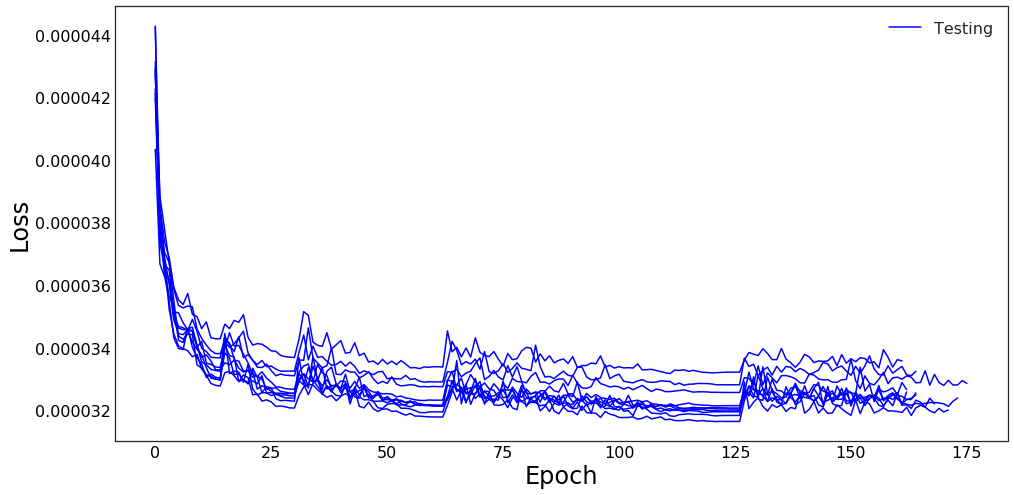

Mean wAUC = 0.0652 +- 0.0006
______________________________________



In [12]:
results, histories = batchTrainClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, patience=50, cosAnnealMult=2, trainOnWeights=True, maxEpochs=maxEpochs, verbose=1)

## Construct ensemble

In [13]:
with open('train_weights/resultsFile.pkl', 'r') as fin:   
    results = pickle.load(fin)

In [14]:
ensemble, weights = assembleEnsemble(results, ensembleSize, ensembleMode, compileArgs)

Choosing ensemble by loss
Model 0 is 8 with loss = 3.164151163023032e-05
Model 1 is 0 with loss = 3.180799490143416e-05
Model 2 is 4 with loss = 3.193367430675843e-05
Model 3 is 2 with loss = 3.1980205764468305e-05
Model 4 is 3 with loss = 3.20368084972818e-05
Model 5 is 9 with loss = 3.2064499567785444e-05
Model 6 is 5 with loss = 3.214024355026644e-05
Model 7 is 1 with loss = 3.257049419815029e-05
Model 8 is 6 with loss = 3.280192713375856e-05
Model 9 is 7 with loss = 3.317570505098029e-05


## Response on development data

In [15]:
batchEnsemblePredict(ensemble, weights, trainData, ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.000567540068202s per sample

Predicting batch 2 out of 10
Prediction took 0.000342431875904s per sample

Predicting batch 3 out of 10
Prediction took 0.000356245384199s per sample

Predicting batch 4 out of 10
Prediction took 0.000341812896729s per sample

Predicting batch 5 out of 10
Prediction took 0.000258246600628s per sample

Predicting batch 6 out of 10
Prediction took 0.000297201859951s per sample

Predicting batch 7 out of 10
Prediction took 0.000397543108463s per sample

Predicting batch 8 out of 10
Prediction took 0.000346409272501s per sample

Predicting batch 9 out of 10
Prediction took 0.000348641780729s per sample

Predicting batch 10 out of 10
Prediction took 0.000327001745042s per sample



In [16]:
print 'Training ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData)),
                                                            roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData), sample_weight=getFeature('weights', trainData)))

Training ROC AUC: unweighted 0.901227214264, weighted 0.938242723321


## Response on val data

In [17]:
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.000263572216034s per sample

Predicting batch 2 out of 10
Prediction took 0.000264689207077s per sample

Predicting batch 3 out of 10
Prediction took 0.000309683799744s per sample

Predicting batch 4 out of 10
Prediction took 0.000303022813797s per sample

Predicting batch 5 out of 10
Prediction took 0.000277106380463s per sample

Predicting batch 6 out of 10
Prediction took 0.00033200879097s per sample

Predicting batch 7 out of 10
Prediction took 0.000317897605896s per sample

Predicting batch 8 out of 10
Prediction took 0.000382171201706s per sample

Predicting batch 9 out of 10
Prediction took 0.000423304033279s per sample

Predicting batch 10 out of 10
Prediction took 0.000378170394897s per sample



In [18]:
print 'Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData), getFeature('pred', valData)),
                                                           roc_auc_score(getFeature('targets', valData), getFeature('pred', valData), sample_weight=getFeature('weights', valData)))

Testing ROC AUC: unweighted 0.899248544747, weighted 0.933614190444


## Evaluation

### Import in dataframe

In [19]:
def convertToDF(datafile, columns={'gen_target', 'gen_weight', 'pred_class'}, nLoad=-1):
    data = pandas.DataFrame()
    data['gen_target'] = getFeature('targets', datafile, nLoad)
    data['gen_weight'] = getFeature('weights', datafile, nLoad)
    data['pred_class'] = getFeature('pred', datafile, nLoad)
    print len(data), "candidates loaded"
    return data

In [20]:
valData = convertToDF(valData)

50000 candidates loaded


In [21]:
sigVal = (valData.gen_target == 1)
bkgVal = (valData.gen_target == 0)

### MVA distributions

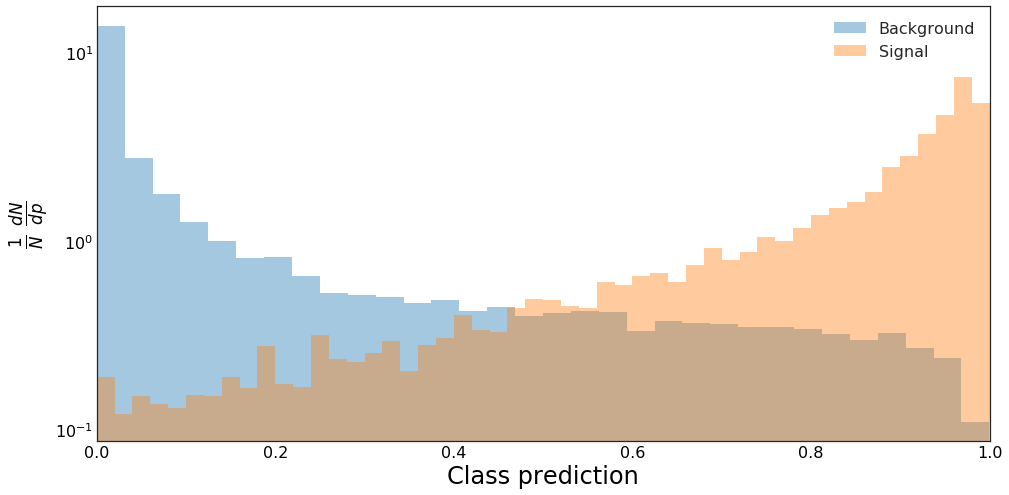

In [22]:
getClassPredPlot([valData[bkgVal], valData[sigVal]], weightName='gen_weight')

In [23]:
amsScan(valData)

[0.9469814300537109, 1.668093899969905]


NameError: global name 'valData' is not defined

In [24]:
scoreTest(ensemble, weights, classTrainFeatures, 0.9469814300537109, 'Day_2_Basic_Features_256_1e-3_swish_mult2_50patience_normedweighted')